In [2]:
import pandas as pd
import ast
from IPython.display import display
from pymongo import MongoClient, errors
import dotenv
import os
import logging
import sys
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import bson
from utils.dbapi import DBapi

dotenv.load_dotenv()
logging.basicConfig(level=logging.INFO)

Index([
       
       'recipe_id', 'i', 'name_tokens', 'ingredient_tokens', 'steps_tokens',

       'techniques', 'calorie_level', 'ingredient_ids', 'name', 'minutes',

       'contributor_id', 'submitted', 'tags', 'nutrition', 'steps', 'n_steps',

       'description', 'ingredients', 'n_ingredients', 'review', 'date',

       'user_id', 'rating', 'cleaned_description', 'cleaned_name',

       'ingredients_processed', 'ingredients_replaced'],
       
      dtype='object')

In [15]:
Index = ['recipe_id', 'techniques', 'minutes', 'contributor_id', 'submitted',
       'steps', 'n_steps', 'review', 'date', 'user_id', 'rating',
       'cleaned_description', 'cleaned_name', 'ingredients_replaced']

print(Index)
print(f'{Index[0]}')

['recipe_id', 'techniques', 'minutes', 'contributor_id', 'submitted', 'steps', 'n_steps', 'review', 'date', 'user_id', 'rating', 'cleaned_description', 'cleaned_name', 'ingredients_replaced']
recipe_id


In [16]:
df = pd.DataFrame()
df.head()

""


In [9]:
db_api = DBapi()
with db_api:
    result = db_api.get_all_from('recipe_id')
    df_temp = pd.DataFrame(result)
    print(df_temp.head())

INFO:root:Connexion à la base de données établie avec succès.
INFO:root:177429 documents trouvés pour recipe_id avec 'recipe_id'.
INFO:root:Connexion à la base de données fermée.


   recipe_id
0         53
1         66
2         84
3         85
4         92


In [18]:
client_DB = DBapi()
with client_DB:
    df_1 = client_DB.get_all_from('recipe_id')
    df_2 = client_DB.get_all_from('date')
    df_3 = client_DB.get_all_from('rating')
    df_1 = pd.DataFrame(df_1)
    df_2 = pd.DataFrame(df_2)
    df_3 = pd.DataFrame(df_3)

INFO:root:Connexion à la base de données établie avec succès.
INFO:root:177429 documents trouvés pour recipe_id avec 'recipe_id'.
INFO:root:177429 documents trouvés pour date avec 'recipe_id'.
INFO:root:177429 documents trouvés pour rating avec 'recipe_id'.
INFO:root:Connexion à la base de données fermée.


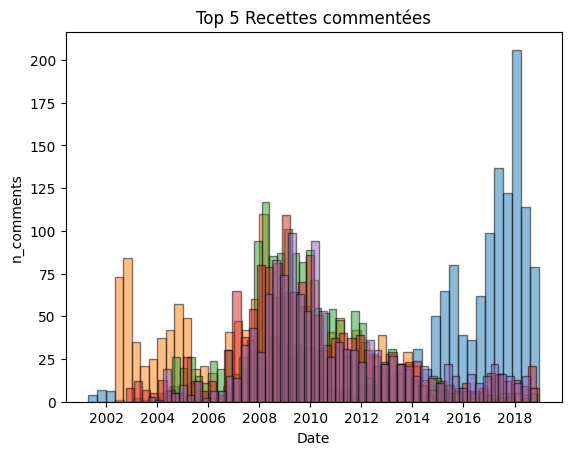

In [ ]:
top_com_df = pd.merge(df_1, df_2, on='recipe_id')
top_com_df = pd.merge(top_com_df, df_3, on='recipe_id')

# nombre de recettes par années
# top_com_df = client_DB.find_by_columns(
#     ["recipe_id", "date", "rating"]
# )top_com_df = pd.merge(df_1, df_2, on='recipe_id')
top_com_df = pd.merge(top_com_df, df_3, on='recipe_id')

# nombre de recettes par années
# top_com_df = client_DB.find_by_columns(
#     ["recipe_id", "date", "rating"]
# )
top_com_df["rating"] = top_com_df["rating"].apply(
    lambda x: ast.literal_eval(x)
)
top_com_df["rating_count"] = top_com_df["rating"].apply(
    len
)
top_com_df["rating_mean"] = top_com_df["rating"].apply(
    lambda x: sum(x) / len(x) if len(x) > 0 else 0
)

n_largest = top_com_df.nlargest(5, 'rating_count')

top_com_df["date"] = top_com_df["date"].apply(lambda x: [pd.to_datetime(date) for date in x])

for i in range(len(n_largest)):
    plt.hist(top_com_df.loc[n_largest.index[i]]['date'], bins=50, edgecolor='black', alpha=0.5)

plt.title('Top 5 Recettes commentées')
plt.xlabel('Date')
plt.ylabel('n_comments')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [18]:
cloud_df = pd.read_csv('../data/cloud_df.csv')
cloud_df.head()

,recipe_id,mean_rating,comment_count,techniques,name,minutes,contributor_id,submitted,n_steps,date,user_id,ingredients_replaced,calories
0,38,4.250000,4,"['blend', 'freez', 'pour', 'smooth', 'strain',...",low fat berry blue frozen dessert,1485,1533,1999-08-09,13,"['2008-02-13', '2009-01-15', '2014-07-22', '20...","[596506, 1060485, 1802956262, 2123645]","['blueberry', 'granulated sugar', 'vanilla yog...",170.9
1,40,4.333333,9,"['pour', 'refrigerat']",best lemonade,35,1566,1999-09-05,8,"['2002-12-18', '2003-02-01', '2003-08-13', '20...","[59064, 70154, 39949, 132353, 172249, 541967, ...","['sugar', 'lemons, rind of', 'fresh water', 'f...",311.1
2,45,2.666667,3,"['bake', 'blend', 'combine', 'pour']",buttermilk pie with gingersnap crumb crust,80,1580,1999-08-06,10,"['2003-09-07', '2009-02-11', '2009-02-17']","[81611, 1057076, 1060485]","['sugar', 'margarine', 'egg', 'egg white', 'fl...",228.0
3,46,5.000000,2,"['combine', 'refrigerat']",a jad cucumber pickle,25,1533,1999-08-11,5,"['2002-04-03', '2005-07-26']","[34280, 22015]","['rice vinegar', None, None, None, None, None]",4.3
4,49,4.350000,20,"['bake', 'boil', 'broil', 'combine', 'pour', '...",chicken breasts lombardi,75,174711,1999-08-14,22,"['2002-06-21', '2002-10-07', '2003-05-18', '20...","[19893, 39835, 69551, 198709, 198344, 365923, ...","['fresh mushroom', 'butter', 'chicken breast h...",627.7


['salt', 'butter', 'onion', 'egg', 'sugar', 'olive oil', 'garlic clove', 'water', 'milk', 'flmy']
[66131, 43764, 38950, 38877, 33678, 31750, 27349, 25801, 21952, 20655]


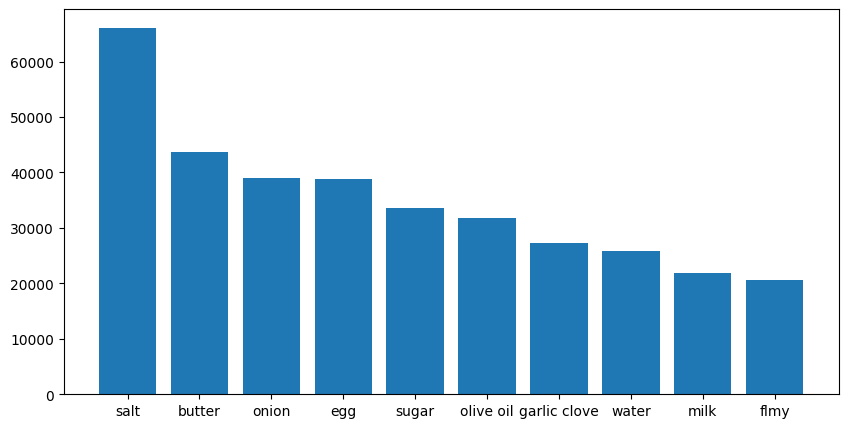

['bake', 'combine', 'pour', 'boil', 'melt', 'drain', 'simmer', 'blend', 'skillet', 'refrigerat']
[64524, 59834, 48518, 42114, 30719, 29436, 29218, 29203, 26730, 20437]


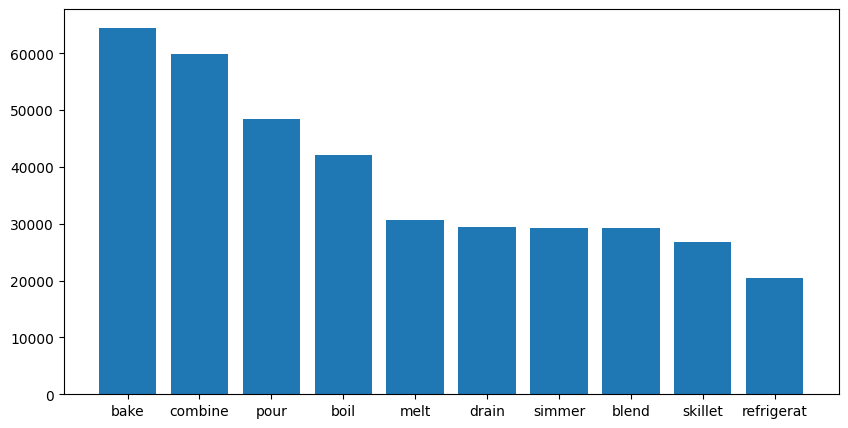

In [30]:
# top 10 ingredients

l_ingredient = list(cloud_df.ingredients_replaced)

list_ingredient = []
for item in l_ingredient: 
    item = ast.literal_eval(item)
    for i in item: 
        list_ingredient.append(i)

element_counts_ing = Counter(list_ingredient)
top_five = element_counts_ing.most_common(10)
list_ing = []
for i in range (len(top_five)):
    list_ing.append(top_five[i][0])

print(list_ing)

count_ing = []

for ing in list_ing:
    count_ing.append(element_counts_ing[ing])

print(count_ing)

plt.figure(figsize=(10, 5))
plt.bar(list_ing, count_ing)
plt.show()

# top 10 techniques

l_techniques = list(cloud_df.techniques)

list_techniques = []
for item in l_techniques: 
    item = ast.literal_eval(item)
    for i in item: 
        list_techniques.append(i)

element_counts_tech = Counter(list_techniques)
top_five = element_counts_tech.most_common(10)
list_tech = []
for i in range (len(top_five)):
    list_tech.append(top_five[i][0])

print(list_tech)

count_tech = []

for tech in list_tech:
    count_tech.append(element_counts_tech[tech])

print(count_tech)

plt.figure(figsize=(10, 5))
plt.bar(list_tech, count_tech)
plt.show()
